# 1.   Исследование объявлений о продаже квартир

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Для данного проекта имеются данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
<br><br>
Имеющиеся признаки:
    
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении
</div>

## 1.1.   Изучение данных из файла

### 1.1.1.   Создаем базу знаний о столбцах

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Сначала выделим то, что знаем – иногда может пригодиться быстрый доступ к пояснению названия столбца
</div>

In [57]:
s = '''airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении'''

knowledge = {}

for i in s.split('\n'):
    knowledge[i.split(' — ')[0]] = i.split(' — ')[1]

### 1.1.2.   Исследуем данные из файла

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Разделитель не по запятой, а по \t
</div>

In [251]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим на данные
</div>

In [252]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Выведем только те строки, в которых есть пропущенные значения, их тип и подсчитаем количество пропусков
</div>

In [254]:
for column in data.columns:
    if any(data[column].isna()):
        print(column, '-', knowledge[column])
        print(data[column].dtype)
        print(data[column].isna().sum(), ' | ', round(data[column].isna().sum()/23699*100, 1), '%')
        print()

ceiling_height - высота потолков (м)
float64
9195  |  38.8 %

floors_total - всего этажей в доме
float64
86  |  0.4 %

living_area - жилая площадь в квадратных метрах (м²)
float64
1903  |  8.0 %

is_apartment - апартаменты (булев тип)
object
20924  |  88.3 %

kitchen_area - площадь кухни в квадратных метрах (м²)
float64
2278  |  9.6 %

balcony - число балконов
float64
11519  |  48.6 %

locality_name - название населённого пункта
object
49  |  0.2 %

airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
float64
5542  |  23.4 %

cityCenters_nearest - расстояние до центра города (м)
float64
5519  |  23.3 %

parks_around3000 - число парков в радиусе 3 км
float64
5518  |  23.3 %

parks_nearest - расстояние до ближайшего парка (м)
float64
15620  |  65.9 %

ponds_around3000 - число водоёмов в радиусе 3 км
float64
5518  |  23.3 %

ponds_nearest - расстояние до ближайшего водоёма (м)
float64
14589  |  61.6 %

days_exposition - сколько дней было размещено объявление (от публикации д

### 1.1.3.   Вывод

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В основном у нас пропущены числовые значения, с которыми работать проще
<br><br>
Так же есть пропуски в апартаментах, будет необходимо выяснить закономерности, в балконах (там проще, балконов скорее всего нет) и в расстоянии до ближайших парков и водоемов
<br><br>
Остальные пропуски значительно меньше
</div>

## 1.2.   Предобработка данных

### 1.2.1.   Количество этажей в доме

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим на боксплот наших данных
</div>

<AxesSubplot:>

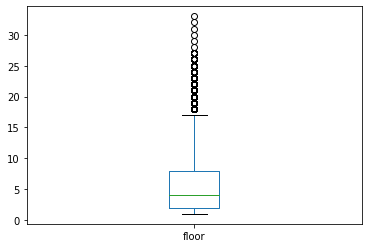

In [255]:
data['floor'].plot(kind='box')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В целом, выглядит логично – медиана между 3 и 5, 75% данных не превышают ~8 этажей. Остальные видятся как выбросы, но и высотками Санкт-Петербург не обделен
<br><br>
Есть предположение, что число этажей не указывают тогда, когда это частный дом, стоит проверить
</div>

In [256]:
data.query('floors_total.isna()')[['floors_total', 'floor']].head()

,floors_total,floor
186,NaN,4
237,NaN,1
457,NaN,12
671,NaN,8
1757,NaN,9


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Неверно, этажи там есть
<br><br>
Можно заполнить медианными значениями, но главное – учитывать этаж при заполнении
<br><br>
Нам такая конструкция пригодится еще не раз, создадим универсальную
</div>

In [257]:
# запоминаем все данные, которые оказались пропущены
lost_data = data.query('floors_total.isna()')['floor'].unique()
# создаем словарь для хранения показателей известных данных
lost_data_median = {}
# пробегаемся по элементам пропущенных данных
for item in lost_data:
    # заполняем словарик
    lost_data_median[item] = (data
                                 # просим все такие же данные с известными показателями
                                 .query('floor == @item and not floors_total.isna()')['floors_total']
                                 # берем медианное значение
                                 .median()
                                )
# заполняем все пропущенные значения в соответствии со словарем
for row in data.query('floors_total.isna()').index:
    data.loc[row, 'floors_total'] = lost_data_median[data.loc[row]['floor']]

In [258]:
# повторяем упражнение
data.query('floors_total.isna()')[['floors_total', 'floor']]

,floors_total,floor


### 1.2.2.   Высота потолков

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим на ошибки в высоте потолков
</div>

<AxesSubplot:>

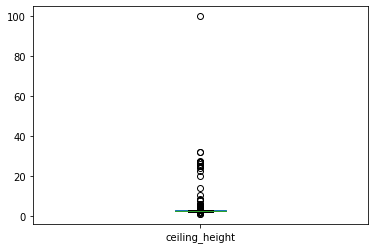

In [260]:
data['ceiling_height'].plot(kind='box')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Сразу бросается в глаза выброс под 100м высоты потолка – надо разобраться, куда им столько
</div>

In [261]:
(data
 .query('ceiling_height > 5')
 .sort_values(by='ceiling_height', ascending=False)
 .head(8))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
21824,20,2450000.0,44.0,2019-02-12T00:00:00,2,27.0,2.0,38.0,2,False,...,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В помещении общей площадью 25 кв. м высота потолка даже 10м уже будет странно, так что скорее всего это очень странный выброс
</div>

In [263]:
data = data[(data['ceiling_height'] < 100) | (data['ceiling_height'].isna())]

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Все остальные показатели можно предположить как указанные в дециметрах (веселая система, конечно), то есть 20м это на самом деле 2м, и все что больше 20 можно заменить на десятую часть
</div>

In [160]:
for i in data.query('ceiling_height >= 20').index:
    data.loc[i, 'ceiling_height'] = data.loc[i, 'ceiling_height']/10

<AxesSubplot:>

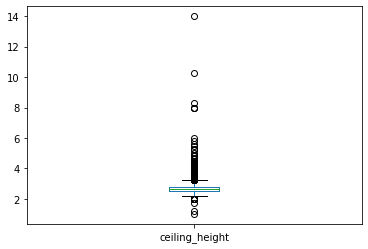

In [161]:
data['ceiling_height'].plot(kind='box')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Лично я готов предположить, что в особенных домах вполне возможны потолки под 14м, так что эти данные оставляем
<br><br>
Посмотрим, сможем ли мы опираться на количество этажей в подобных квартирах
</div>

In [162]:
data.query('ceiling_height.isna()')[['ceiling_height', 'floors_total']].head()

,ceiling_height,floors_total


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Думаю, сможем, и можно поступить так же как и в прошлый раз
</div>

In [163]:
lost_ceiling = list(data.query('ceiling_height.isna()')['floors_total'].unique())
lost_ceiling_median = {}
for floor in lost_ceiling:
    lost_ceiling_median[floor] = (data
                                 .query('floor == @floor and not ceiling_height.isna()')['ceiling_height']
                                 .median())
for row in data.query('ceiling_height.isna()').index:
    data.loc[row, 'ceiling_height'] = lost_ceiling_median[data.loc[row]['floors_total']]

In [164]:
data.query('ceiling_height.isna()')[['ceiling_height', 'floors_total', 'floor']].head()

,ceiling_height,floors_total,floor


### 1.2.3.   Жилая площадь

<AxesSubplot:>

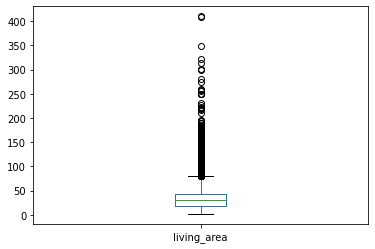

In [165]:
data['living_area'].plot(kind='box')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В целом, никаких аномальных выбросов не видно
<br><br>
Посмотрим, какие у нас есть пропуски
</div>

In [166]:
data.query('living_area.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
116,18,10999000.0,97.2,2017-11-13T00:00:00,3,2.50,16.0,NaN,16,NaN,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
165,17,7430000.0,60.2,2019-02-28T00:00:00,2,2.50,4.0,NaN,2,NaN,...,10.2,NaN,Сестрорецк,54526.0,35625.0,0.0,NaN,0.0,NaN,NaN
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,NaN,1,NaN,...,NaN,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
276,5,23900000.0,108.4,2018-11-15T00:00:00,3,3.06,7.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,26819.0,5026.0,1.0,657.0,1.0,678.0,96.0


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим, сколько раз пропускались и жилая и общая площадь
</div>

In [167]:
data.query('living_area.isna() and total_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
0 раз – это хорошо, значит, мы сможем опираться на их медианное значение
<br><br>
Но так просто тут уже не выйдет – площади уникальны, и ориентироваться надо с разбросом +/- 5 кв. м
</div>

In [168]:
lost_area = [int(i) for i in data.query('living_area.isna()')['total_area'].unique()]
lost_area_median = {}
for total in lost_area:
    lost_area_median[total] = (data
                                 .query('@total-5 < total_area < @total+5 and not living_area.isna()')['living_area']
                                 .median())
for row in data.query('living_area.isna()').index:
    data.loc[row, 'living_area'] = lost_area_median[int(data.loc[row]['total_area'])]

In [169]:
data.query('living_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15016,8,150000000.0,500.0,2016-01-13T00:00:00,4,3.20,7.0,NaN,7,NaN,...,NaN,0.0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
19392,5,71000000.0,371.0,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
22131,14,27000000.0,422.2,2018-10-18T00:00:00,5,2.70,13.0,NaN,11,NaN,...,NaN,NaN,Санкт-Петербург,46625.0,16554.0,0.0,NaN,0.0,NaN,NaN


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Остались 3 самых непоколебимых квартиры. Значения общей площади очень большие, посмотрим, сколько подобных квартир есть в районе +/- 50 кв. м
</div>

In [170]:
print('370:', data.query('390 < total_area < 590 and not living_area.isna()').shape)
print('500:', data.query('450 < total_area < 550 and not living_area.isna()').shape)
print('420:', data.query('370 < total_area < 570 and not living_area.isna()').shape)

370: (14, 22)
500: (7, 22)
420: (15, 22)


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Очень уважаемо, нам хватит на средние. Применим к ним отдельно
</div>

In [171]:
lost_area = [int(i) for i in data.query('living_area.isna()')['total_area'].unique()]
lost_area_median = {}
for total in lost_area:
    lost_area_median[total] = (data
                                 .query('@total-50 < total_area < @total+50 and not living_area.isna()')['living_area']
                                 .median()
                                )
for row in data.query('living_area.isna()').index:
    data.loc[row, 'living_area'] = lost_area_median[int(data.loc[row]['total_area'])]

In [172]:
data.query('living_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Прекрасно, с ними мы тоже справились
</div>

### 1.2.4.   Площадь кухни

<AxesSubplot:>

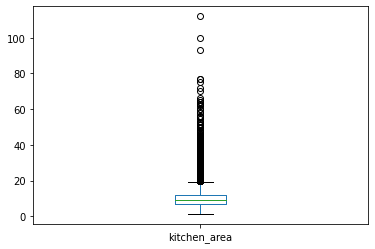

In [173]:
data['kitchen_area'].plot(kind='box')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Очень странные данные, кухни за 100 кв. м?
</div>

<AxesSubplot:>

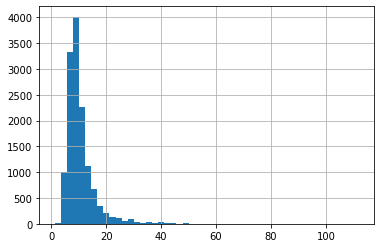

In [174]:
data['kitchen_area'].hist(bins=50)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Не так много, но выше 40 кв. м кухни все таки есть
</div>

<AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>

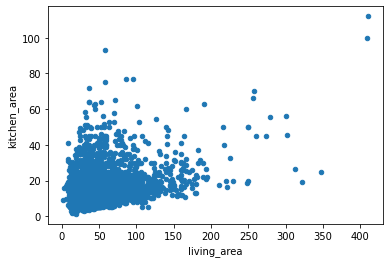

In [175]:
data.sort_values(by='kitchen_area').plot(x='living_area', y='kitchen_area', kind='scatter')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
И, как выяснилось, есть даже те, у которых своя площадь больше, чем площадь квартиры
</div>

In [176]:
data.query('kitchen_area >= living_area')[['living_area', 'kitchen_area']]

,living_area,kitchen_area
4,32.00,41.00
51,38.00,50.00
101,12.00,13.00
263,39.80,49.20
379,20.00,36.00
...,...,...
22597,16.40,17.50
23148,20.00,28.00
23573,13.59,17.87
23574,3.00,16.00


<AxesSubplot:>

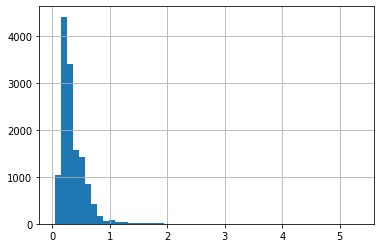

In [177]:
(data['kitchen_area'] / data['living_area']).hist(bins=50)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Соотношения не выглядят очень радостно: большинство столпилось около 20-30% от помещения, но есть и больше 100%
</div>

<AxesSubplot:>

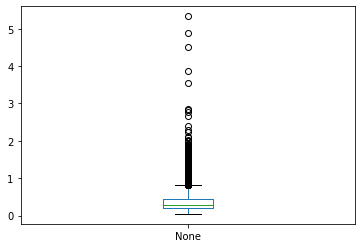

In [178]:
(data['kitchen_area'] / data['living_area']).plot(kind='box')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Все, что выше единицы – применение магии вне Хогвартса, а нас такое не интересует
</div>

In [179]:
data.query('kitchen_area.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,27.0,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.50,3.0,183.0,3,NaN,...,NaN,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
178,18,16300000.0,153.0,2019-03-30T00:00:00,4,2.71,10.0,89.4,10,NaN,...,NaN,1.0,Санкт-Петербург,52130.0,14042.0,0.0,NaN,2.0,346.0,NaN
188,15,4600000.0,38.5,2019-04-16T00:00:00,1,2.50,12.0,18.5,5,NaN,...,NaN,NaN,Санкт-Петербург,49065.0,16735.0,1.0,501.0,0.0,NaN,NaN
199,4,3735325.0,37.4,2019-03-22T00:00:00,1,2.73,12.0,17.0,4,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,21.0


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Чтобы брать адекватные медианные значения – надо мыслить как адекватные медианные значения, а знать выкинуть все кухни, площадь которых больше 80% квартиры (знавал я квартиры, где кухня реально 60-70% занимает)
<br><br>
Как и с жилой площадью, будем ориентироваться на известные показатели – как раз на жилую площадь
</div>

In [180]:
lost_area = [int(i) for i in data.query('kitchen_area.isna()')['living_area'].unique()]
lost_area_median = {}
for total in lost_area:
    lost_area_median[total] = (data
                               .query('@total-5 < living_area < @total+5')
                               # доп. условие на соотношение площади кухни
                               .query('kitchen_area < 0.8 * living_area')
                               .query('not kitchen_area.isna()')['kitchen_area']
                               .median()
                               ) 
for row in data.query('kitchen_area.isna()').index:
    data.loc[row, 'kitchen_area'] = lost_area_median[int(data.loc[row]['living_area'])]

In [181]:
data.query('kitchen_area.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Теперь разберемся с оставшимися кухнями, больше площади квартиры
<br><br>
Можно так же предположить, что случайно не дописали запятую, и на самом деле у нас кухня при 30 кв.м жилья не 41 кв.м, а всего 4 кв.м, что выглядит намного более логично
</div>

In [182]:
for row in data.query('kitchen_area > 0.8 * living_area').index:
    data.loc[row, 'kitchen_area'] = data.loc[row, 'kitchen_area'] / 10

<AxesSubplot:>

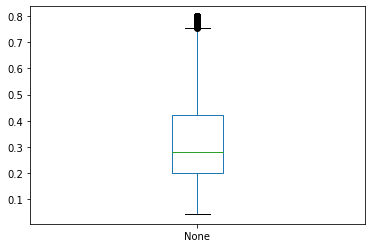

In [183]:
(data['kitchen_area'] / data['living_area']).plot(kind='box')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Намного больше похоже на правду
</div>

### 1.2.5.   Балконы

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Если нет информации о балконах – скорее всего, нет балконов
</div>

<AxesSubplot:>

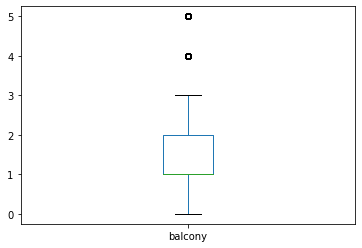

In [184]:
data['balcony'].plot(kind='box')

In [185]:
# проставляем в пропусках балконов нули
data['balcony'] = data['balcony'].fillna(0)

In [186]:
data.query('balcony.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Замечательно
</div>

### 1.2.6.   Название населённого пункта

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
49 пропусков – поставим в "Остальные"
</div>

In [187]:
data.query('locality_name.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
9821,13,8000000.0,94.5,2015-01-21T00:00:00,4,3.00,2.0,57.80,2,NaN,...,11.30,0.0,NaN,24953.0,3801.0,1.0,375.0,2.0,532.0,531.0
13223,1,2919911.0,29.4,2015-03-12T00:00:00,1,2.75,24.0,21.10,2,NaN,...,8.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,470.0


In [188]:
data['locality_name'] = data['locality_name'].fillna('Остальные')

In [189]:
data.query('locality_name.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### 1.2.7.   Срок размещения объявления

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Как раз самое время переделать столбцы со временем в красивый тип данных
</div>

In [190]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [191]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,4.1,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,NaN,...,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,NaN,...,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0


<AxesSubplot:>

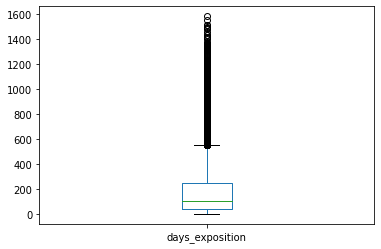

In [192]:
data['days_exposition'].plot(kind='box')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Пропуски в дате снятия объявления появляются из за того, что объявление еще активно
<br><br>
Надо проверить
</div>

<AxesSubplot:>

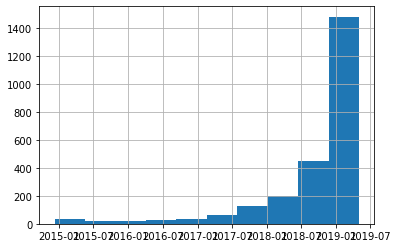

In [193]:
data.query('days_exposition.isna()')['first_day_exposition'].hist()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Не зная, сколько это объявление еще провисит на сайте – не будем подставлять сегодняшний день как финальный 
</div>

### 1.2.8.   Остальное

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим, что у нас осталось с пропусками
</div>

In [194]:
for column in data.columns:
    if any(data[column].isna()):
        print(column, '-', knowledge[column])
        print(data[column].dtype)
        print(data[column].isna().sum(), ' | ', round(data[column].isna().sum()/23699*100, 1), '%')
        print()

is_apartment - апартаменты (булев тип)
object
12642  |  53.3 %

airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
float64
2964  |  12.5 %

cityCenters_nearest - расстояние до центра города (м)
float64
2944  |  12.4 %

parks_around3000 - число парков в радиусе 3 км
float64
2943  |  12.4 %

parks_nearest - расстояние до ближайшего парка (м)
float64
9210  |  38.9 %

ponds_around3000 - число водоёмов в радиусе 3 км
float64
2943  |  12.4 %

ponds_nearest - расстояние до ближайшего водоёма (м)
float64
8772  |  37.0 %

days_exposition - сколько дней было размещено объявление (от публикации до снятия)
float64
2453  |  10.4 %



<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Числа и расстояния рассчитать не представляется возможным – брать среднее нелогично, а высчитывать по похожим – мешает окружность
<br><br>
Для их анализа выглядит разумным заполнить нулями
</div>

In [195]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Апартамены можно было бы привязать к площади квартиры, высоте потолков и остальным более–менее причастным данным, не будь этих пропусков 88%, слишком высока погрешность данных
<br><br>
Судя по всему, именно эти данные стоит оставить нетронутыми – люди не указывали их, и вряд ли выйдет верно предположить, как именно обстоят там дела
</div>

### 1.2.9.   Изменение типов данных

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14503 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14503 non-null  int64         
 1   last_price            14503 non-null  float64       
 2   total_area            14503 non-null  float64       
 3   first_day_exposition  14503 non-null  datetime64[ns]
 4   rooms                 14503 non-null  int64         
 5   ceiling_height        14503 non-null  float64       
 6   floors_total          14503 non-null  float64       
 7   living_area           14503 non-null  float64       
 8   floor                 14503 non-null  int64         
 9   is_apartment          1861 non-null   object        
 10  studio                14503 non-null  bool          
 11  open_plan             14503 non-null  bool          
 12  kitchen_area          14503 non-null  float64       
 13  balcony         

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь выглядит логичным привести балконы, а также количество парков и водоемов к типу int</div>

In [197]:
columns = ['balcony', 'parks_around3000', 'ponds_around3000']
for col in columns:
    data[col] = data[col].astype(int)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Теперь у нас готовы данные для расчетов и работы с ними
</div>

### 1.2.10.   Заключение

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Большинство пропусков нелогичны – высота потолков, или площадь кухни. Либо сервис размещения сбоит и позволяет ввести нереальные данные, либо с выгрузкой что то не так, стоит обратиться в распределительный центр и уточнить. Но мы тут одни в поле воины, так что спасаемся тем что умеем. 
<br><br>
Некоторые пропуски наоборот, логичные – те же самые дни размещения, или балконы. Это стоит учитывать, так как это дополнительная информация прямо в руки.
</div>

## 1.3.   Расчёты и добавление результатов в таблицу

### 1.3.1.   Считаем цену квадратного метра

In [198]:
# стоимость помещения делим на его общий метраж
data['square_price'] = (data['last_price'] / data['total_area']).astype(int)

In [199]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,NaN,...,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,NaN,...,1,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366.0,82943


### 1.3.2.   Добавляем этаж помещения

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Создадим удобную функцию автоматического определения этажа
</div>

In [202]:
def floor_identify(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

# применяем к датафрейму
data['floor_cat'] = data.apply(floor_identify, axis=1)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,floor_cat
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,Другой
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524,Другой
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,NaN,...,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525,Другой
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,NaN,...,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366.0,82943,Последний


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Небольшая проверка
</div>

In [203]:
data.query('floor == 1')[['floor', 'floor_cat']].head()

,floor,floor_cat
16,1,Первый
28,1,Первый
37,1,Первый
68,1,Первый
76,1,Первый


In [204]:
data.query('floor == floors_total')[['floor', 'floor_cat']].head()

,floor,floor_cat
13,5,Последний
23,9,Последний
43,4,Последний
52,2,Последний
64,5,Последний


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Справились
</div>

### 1.3.3.   Соотношения площадей

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Сначала разберемся с отношением жилой к общей
</div>

In [206]:
data['living_to_total_square'] = data['living_area'] / data['total_area']

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,floor_cat,living_to_total_square
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,Другой,0.472222
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,Другой,0.320000
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,50898.0,15008.0,0,NaN,0,NaN,289.0,88524,Другой,0.714754
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,NaN,...,38357.0,13878.0,1,310.0,2,553.0,137.0,127525,Другой,0.512626
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,NaN,...,37868.0,33058.0,1,294.0,3,298.0,366.0,82943,Последний,0.630841


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Теперь можно узнать соотношения кухни к общей
</div>

In [208]:
data['kitchen_to_total_square'] = data['kitchen_area'] / data['total_area']

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,floor_cat,living_to_total_square,kitchen_to_total_square
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,16028.0,1,482.0,2,755.0,NaN,120370,Другой,0.472222,0.231481
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,8098.0,2,112.0,1,48.0,121.0,100000,Другой,0.320000,0.041000
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,15008.0,0,NaN,0,NaN,289.0,88524,Другой,0.714754,0.106557
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,NaN,...,13878.0,1,310.0,2,553.0,137.0,127525,Другой,0.512626,0.214646
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,NaN,...,33058.0,1,294.0,3,298.0,366.0,82943,Последний,0.630841,0.121495


### 1.3.4.   День недели, месяц и год

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
При помощи функций пандаса создадим три новых столбца
</div>

In [210]:
data['exposition_year'] = data['first_day_exposition'].dt.year
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_dayofweek'] = data['first_day_exposition'].dt.dayofweek

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_price,floor_cat,living_to_total_square,kitchen_to_total_square,exposition_year,exposition_month,exposition_dayofweek
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2,755.0,NaN,120370,Другой,0.472222,0.231481,2019,3,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1,48.0,121.0,100000,Другой,0.320000,0.041000,2018,6,1
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,0,NaN,289.0,88524,Другой,0.714754,0.106557,2017,2,6
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,NaN,...,2,553.0,137.0,127525,Другой,0.512626,0.214646,2017,11,3
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,NaN,...,3,298.0,366.0,82943,Последний,0.630841,0.121495,2017,7,5


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Теперь имеем отдельно день недели, месяц и год, с ними можно работать более удобно
</div>

## 1.4.   Исследовательский анализ данных

### 1.4.1.   Построение гистограмм

#### 1.4.1.1.   По всей площади помещения

<AxesSubplot:>

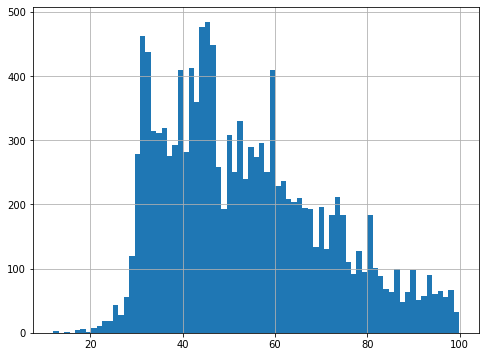

In [211]:
data.query('total_area < 100')['total_area'].hist(bins=75, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь все выглядит культурно – около 30 и 45 кв. м имеются пики, но не критичные – возможно, таких квартир действительно больше
</div>

<AxesSubplot:>

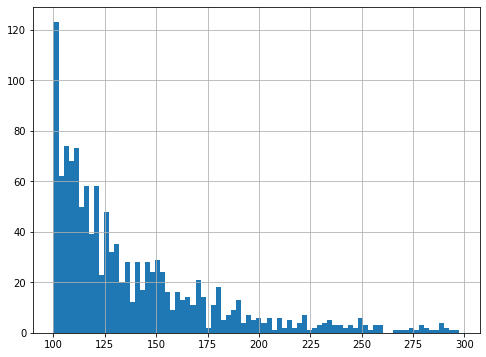

In [212]:
data.query('total_area >= 100 and total_area < 300')['total_area'].hist(bins=80, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь уже ситуация более странная – резкий взлет квартир по 100-102 метра
</div>

<AxesSubplot:>

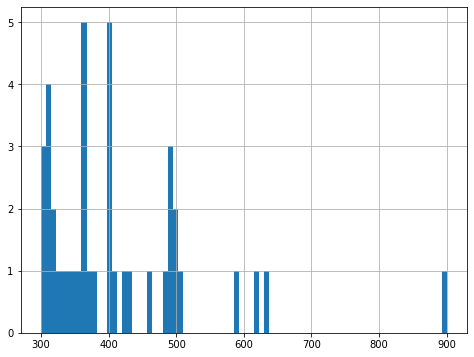

In [213]:
data.query('total_area >= 300')['total_area'].hist(bins=80, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Таких квартир крайне немного, и можно увидеть, что различия у них критические – не типовые квартиры могут быть абсолютно разными
</div>

#### 1.4.1.2.   По цене продажи

In [214]:
(data['last_price'] / 1000).describe()

count     14503.000000
mean       6835.134346
std       10182.084512
min          12.190000
25%        3570.000000
50%        4850.000000
75%        7000.000000
max      420000.000000
Name: last_price, dtype: float64

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Пройдемся по квантилям
<br><br>
Все что дешевле 3.57 млн
</div>

<AxesSubplot:>

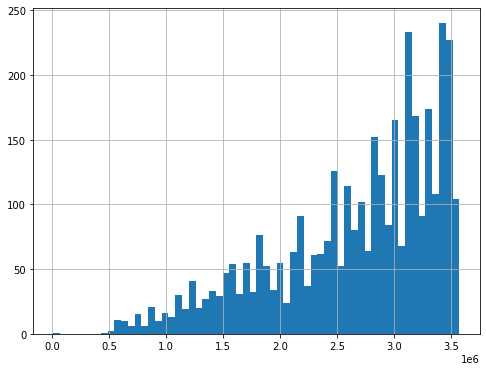

In [215]:
data.query('last_price <= 3570000')['last_price'].hist(bins=60, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Вполне логичный рост стандартных небольших квартир – практически линейный, с пиками в районах круглых чисел
<br><br>
Теперь от 3.57 до 4.85 млн
</div>

<AxesSubplot:>

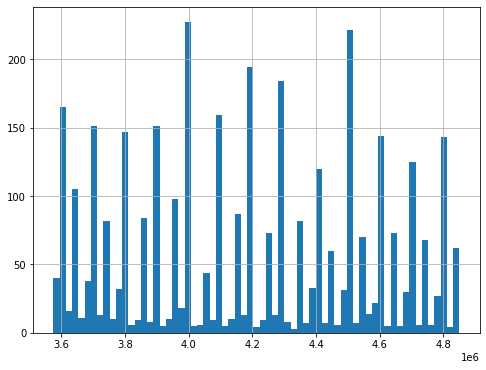

In [216]:
data.query('last_price > 3570000 and last_price <= 4850000')['last_price'].hist(bins=65, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Уже не так линейно, однако все еще можно заметить пики именно в районах красивых чисел
<br><br>
От 4.85 до 7 млн
</div>

<AxesSubplot:>

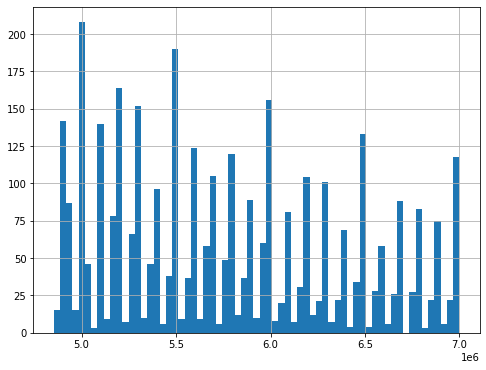

In [217]:
data.query('last_price > 4850000 and last_price <= 7000000')['last_price'].hist(bins=65, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Та же самая история – чуть больше 200 квартир с приятными глазу ценами
<br><br>
От 7 до 50 млн
</div>

<AxesSubplot:>

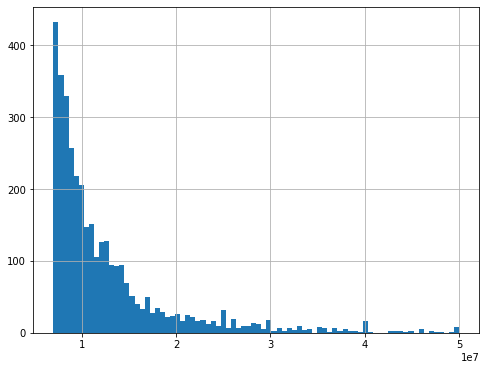

In [218]:
data.query('last_price > 7000000 and last_price <= 50000000')['last_price'].hist(bins=80, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Тут уже тяжелая артеллерия – количество квартир с такими ценами пошло на убыль
<br><br>
И все что больше 50 млн
</div>

<AxesSubplot:>

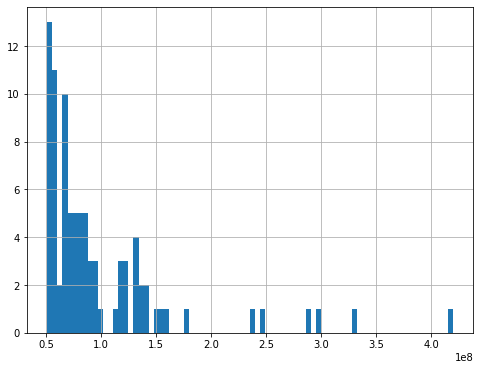

In [219]:
data.query('last_price > 50000000')['last_price'].hist(bins=80, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Редкие квартиры после 150 млн, редкие проблески десятков квартир между 50 и 100 млн
</div>

#### 1.4.1.3.   По количеству комнат

<AxesSubplot:>

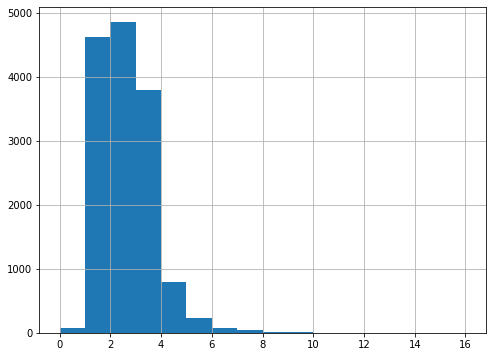

In [220]:
data['rooms'].hist(bins=16, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
От одной до четырех комнат – самый предпочтительный вариант, с приоритетом на две
</div>

#### 1.4.1.4.   По высоте потолков

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Логика та же – делим на шаги по 1 метру и оцениваем
<br><br>
Сначала все что меньше 2 м
</div>

<AxesSubplot:>

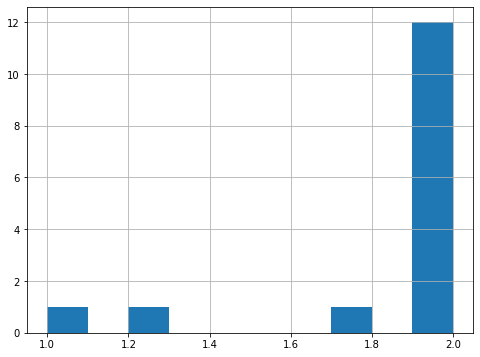

In [221]:
data.query('ceiling_height <= 2')['ceiling_height'].hist(bins=10, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
По одной нестандартной квартире на 1, 1.2 и 1.7 метра высотой, и пик на 2
<br><br>
От 2 до 3 метров
</div>

<AxesSubplot:>

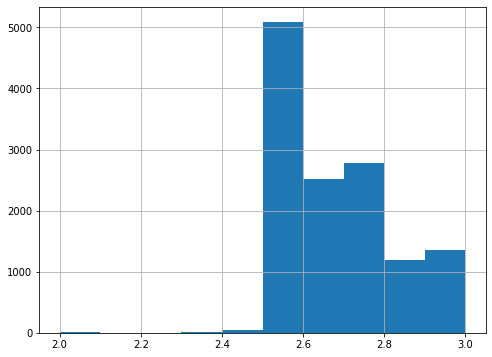

In [222]:
data.query('ceiling_height >= 2 and ceiling_height <= 3')['ceiling_height'].hist(bins=10, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Пик на 2 метра ушел, дав место 5000+ квартир по 2.5 метра. Выглядит разумно
<br><br>
От 3 и до 4 метров
</div>

<AxesSubplot:>

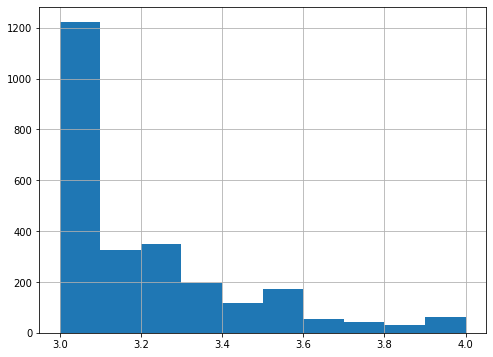

In [223]:
data.query('ceiling_height >= 3 and ceiling_height <= 4')['ceiling_height'].hist(bins=10, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
3 метра популярны, хоть и не дотягивают до 2, а дальше спад</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
И все что от 4 и дальше</div>

<AxesSubplot:>

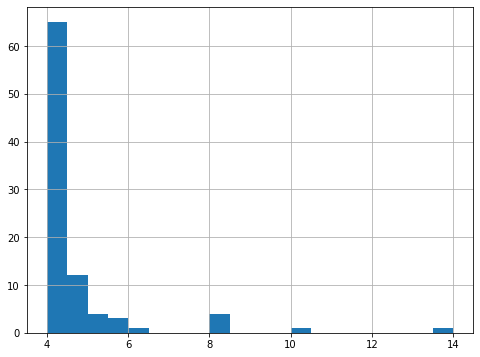

In [224]:
data.query('ceiling_height >= 4')['ceiling_height'].hist(bins=20, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Под 70 с небольшим квартир с 4 метра потолками и единичные случаи большей высоты</div>

### 1.4.2.   Заключение

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Как и в жизни, здесь влавствуют стандартные значения – большинство типовых показателей в параметрах выдают пики, цены выше +/- 3 млн ставят на круглые цифры</div>

### 1.4.3.   Время продажи квартиры

#### 1.4.3.1.   Гистограмма

<AxesSubplot:>

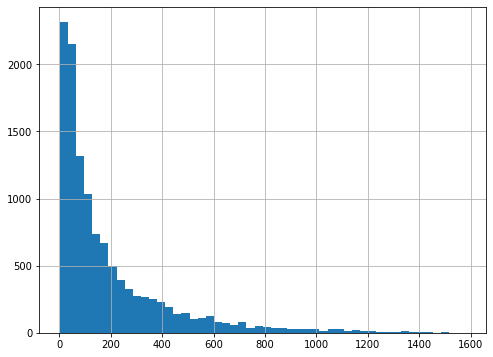

In [225]:
data['days_exposition'].hist(bins=50, figsize=(8, 6))

#### 1.4.3.2.   Редкие и пиковые значения

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Уберем все что ниже 1 и выше 99 квантилей</div>

In [226]:
days_exposition_q1 = data.days_exposition.quantile(.01)
days_exposition_q99 = data.days_exposition.quantile(.99)
data['days_exposition'] = (data
                           [data.days_exposition > days_exposition_q1]
                           [data.days_exposition < days_exposition_q99]
                           ['days_exposition'])

<AxesSubplot:>

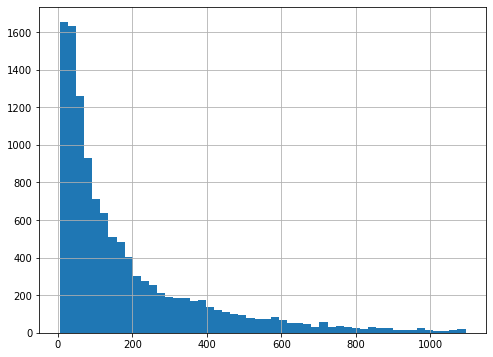

In [227]:
data['days_exposition'].hist(bins=50, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Получили намного меньше значений, значит, выбросов было достаточно</div>

#### 1.4.3.3.   Среднее и медиана

In [228]:
print('Среднее:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())

Среднее: 182.70778279771545
Медиана: 104.0


#### 1.4.3.4.   Анализ

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Среднее время продажи – 182 дня, в то время как медианное – 104 дня</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
По графику видно, что большую часть покупают за первые 100 дней</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Самые быстрые продажи – около 10-20 дней после публикации</div>

### 1.4.4.   Площадь квартиры

#### 1.4.4.1.   Гистограмма

<AxesSubplot:>

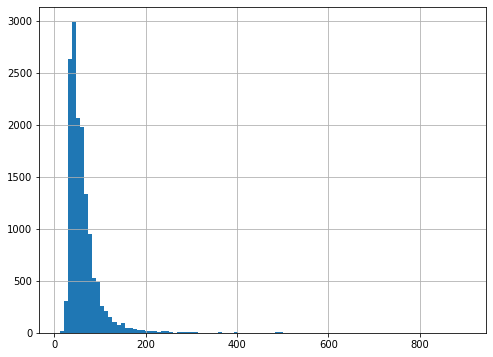

In [86]:
data['total_area'].hist(bins=100, figsize=(8, 6))

#### 1.4.4.2.   Редкие и пиковые значения

In [87]:
total_area_q1 = data.total_area.quantile(.01)
total_area_q99 = data.total_area.quantile(.99)
data['total_area'] = (data
                           [data.total_area > total_area_q1]
                           [data.total_area < total_area_q99]
                           ['total_area'])

<AxesSubplot:>

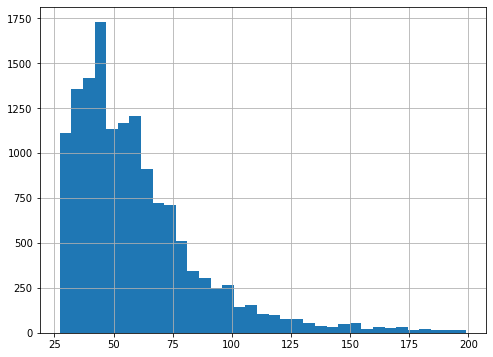

In [88]:
data['total_area'].hist(bins=35, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Намного более наглядно, пик около 35-40</div>

#### 1.4.4.3.   Среднее и медиана

In [89]:
print('Среднее:', data['total_area'].mean())
print('Медиана:', data['total_area'].median())

Среднее: 59.94330940315315
Медиана: 53.4


#### 1.4.4.4.   Анализ

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Средняя площадь квартиры – 60 кв. м, медианная – 53 кв. м</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
По графику видно, что большую часть квартир составляют ~45 кв. м</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Редкими квартирами можно считать те, которые больше 100 кв. м</div>

### 1.4.5.   Цена квартиры

#### 1.4.5.1.   Гистограмма

<AxesSubplot:>

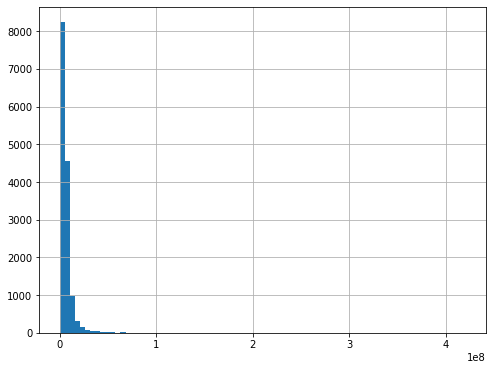

In [90]:
data['last_price'].hist(bins=80, figsize=(8, 6))

#### 1.4.5.2.   Редкие и пиковые значения

<AxesSubplot:>

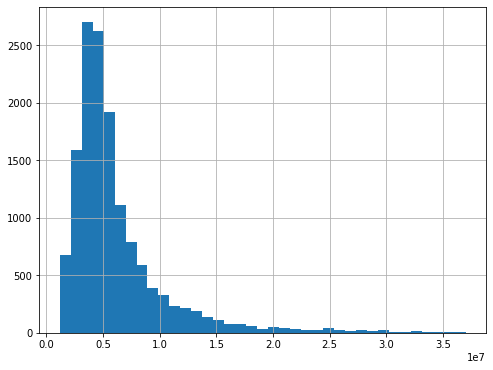

In [92]:
last_price_q1 = data.last_price.quantile(.01)
last_price_q99 = data.last_price.quantile(.99)
data['last_price'] = (data
                           [data.last_price > last_price_q1]
                           [data.last_price < last_price_q99]
                           ['last_price'])

data['last_price'].hist(bins=37, figsize=(8, 6))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Ограничились ценой до 38 млн</div>

#### 1.4.5.3.   Среднее и медиана

In [93]:
print('Среднее:', data['last_price'].mean())
print('Медиана:', data['last_price'].median())

Среднее: 6181071.5278833965
Медиана: 4850000.0


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Самая частая цена – от ~3 до ~6 млн 
<br><br>Среднее на 6.1, медиана на 4.9 
<br><br>Преобладают квартиры дороже 5 млн</div>

### 1.4.6.   Число комнат

#### 1.4.6.1.   Гистограмма

<AxesSubplot:>

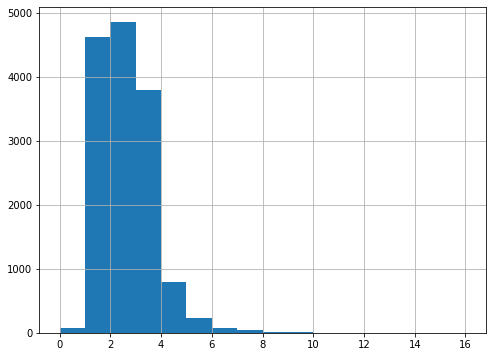

In [94]:
data['rooms'].hist(bins=16, figsize=(8, 6))

#### 1.4.6.2.   Редкие и пиковые значения

In [95]:
rooms_q1 = data.rooms.quantile(.01)
rooms_q99 = data.rooms.quantile(.99)
data['rooms'] = (data
                           [data.rooms > rooms_q1]
                           [data.rooms < rooms_q99]
                           ['rooms'])

<AxesSubplot:>

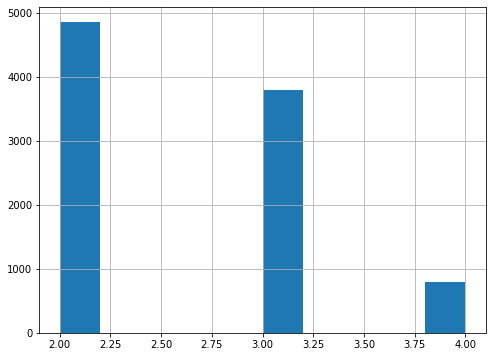

In [96]:
data['rooms'].hist(bins=10, figsize=(8, 6))

#### 1.4.6.3.   Среднее и медиана

In [97]:
print('Среднее:', data['rooms'].mean())
print('Медиана:', data['rooms'].median())

Среднее: 2.5709291238478653
Медиана: 2.0


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Чаще всего людей интересуют двухкомнатные квартиры, с небольшим отставанием трешки, а с четырмя комнатами – уже исключительные продажи</div>

### 1.4.7.   Высота потолков

#### 1.4.7.1.   Гистограмма

<AxesSubplot:>

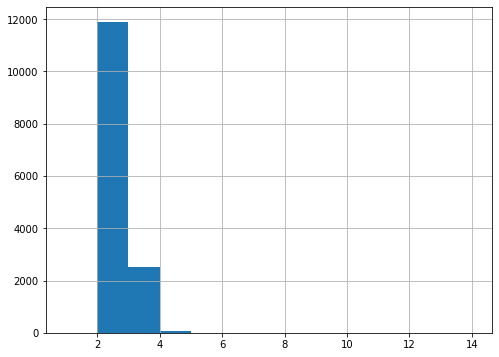

In [98]:
data['ceiling_height'].hist(bins=13, figsize=(8, 6))

#### 1.4.7.2.   Редкие и пиковые значения

<AxesSubplot:>

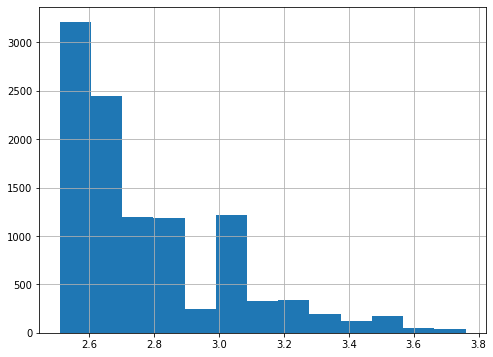

In [100]:
ceiling_height_q1 = data.ceiling_height.quantile(.01)
ceiling_height_q99 = data.ceiling_height.quantile(.99)
data['ceiling_height'] = (data
                           [data.ceiling_height > ceiling_height_q1]
                           [data.ceiling_height < ceiling_height_q99]
                           ['ceiling_height'])

data['ceiling_height'].hist(bins=13, figsize=(8, 6))

#### 1.4.7.3.   Среднее и медиана

In [101]:
print('Среднее:', data['ceiling_height'].mean())
print('Медиана:', data['ceiling_height'].median())

Среднее: 2.7851189812232753
Медиана: 2.7


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Заметно, что начиная с самой популярной высоты потолка – 2.5м спрос идет по убывающей, однако, вновь появляется на стандартной высоте в 3м</div>

### 1.4.8.   Зависимость цены

#### 1.4.8.1.   От площади

In [102]:
data[['last_price', 'total_area']].corr()

,last_price,total_area
last_price,1.00000,0.78709
total_area,0.78709,1.00000


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

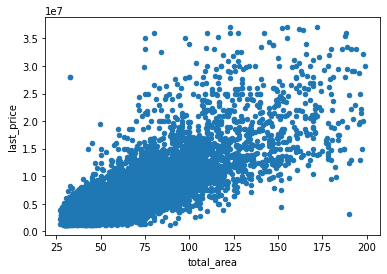

In [103]:
data.plot(x='total_area', y='last_price', kind='scatter')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь видна линейная зависимость – чем больше площадь, тем выше цена</div>

#### 1.4.8.2.   От числа комнат

In [104]:
data[['last_price', 'rooms']].corr()

,last_price,rooms
last_price,1.000000,0.327615
rooms,0.327615,1.000000


<AxesSubplot:xlabel='rooms'>

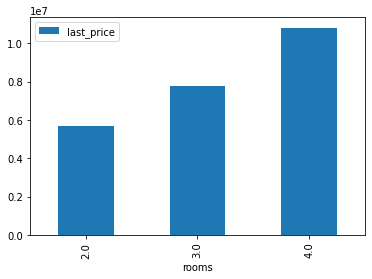

In [105]:
(data
 .pivot_table(index='rooms', 
              values='last_price', 
              aggfunc='mean')
 .plot
 .bar(y='last_price'))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Несмотря на невысокий спрос, квартиры с четырмя комнатами, что логично, по цене выше остальных, так же заметен линейный рост стоимости</div>

#### 1.4.8.3.   От удаленности от центра

In [106]:
data[['last_price', 'cityCenters_nearest']].corr()

,last_price,cityCenters_nearest
last_price,1.000000,-0.342508
cityCenters_nearest,-0.342508,1.000000


<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

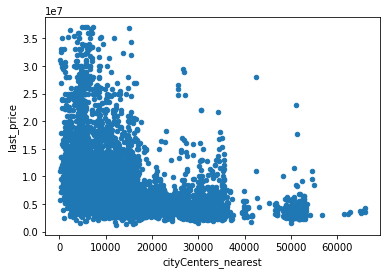

In [107]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter')

In [108]:
cityCenters_nearest_q1 = data.cityCenters_nearest.quantile(.01)
cityCenters_nearest_q99 = data.cityCenters_nearest.quantile(.99)
data['cityCenters_nearest'] = (data
                           [data.cityCenters_nearest > cityCenters_nearest_q1]
                           [data.cityCenters_nearest < cityCenters_nearest_q99]
                           ['cityCenters_nearest'])

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

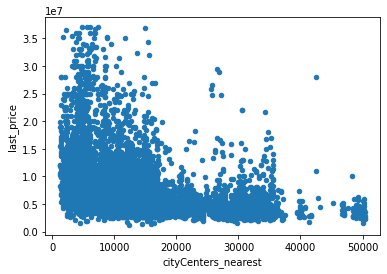

In [109]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь уже можно наблюдать обратную линейную зависимость – как и разброс цены, так и максимальная стоимость выше именно в квартирах в центре, однако, есть выбросы и на более отдаленных</div>

#### 1.4.8.4.   От этажа

In [110]:
def floor_cat_to_numeric(row):
    if row['floor_cat'] == 'Первый':
        return 1
    if row['floor_cat'] == 'Последний':
        return 3
    return 2

data['floor_cat_numeric'] = data.apply(floor_cat_to_numeric, axis=1)

data[['last_price', 'floor_cat_numeric']].corr()

,last_price,floor_cat_numeric
last_price,1.000000,0.060511
floor_cat_numeric,0.060511,1.000000


<AxesSubplot:xlabel='floor_cat_numeric'>

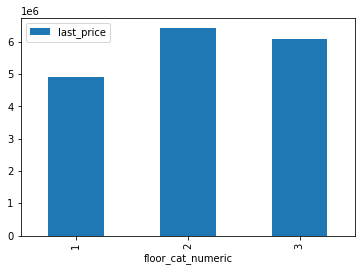

In [111]:
(data
 .pivot_table(index='floor_cat_numeric', 
              values='last_price', 
              aggfunc='mean')
 .plot
 .bar(y='last_price'))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь все чуть более ситуативно – в лидерах последний и между первым и последним этажи, первый же отстает, хоть и не намного
<br><br>Однако, средняя цена выше именно на квартиры с промежуточными этажами</div>

#### 1.4.8.5.   От даты размещения

In [112]:
display(data[['last_price', 'exposition_year']].corr())

,last_price,exposition_year
last_price,1.000000,-0.045844
exposition_year,-0.045844,1.000000


<AxesSubplot:xlabel='exposition_year'>

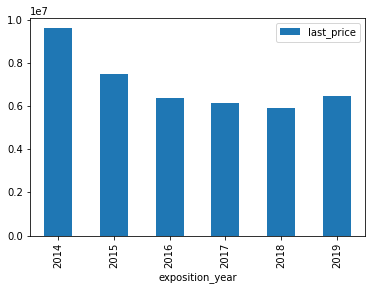

In [113]:
(data
 .pivot_table(index='exposition_year', 
              values='last_price', 
              aggfunc='mean')
 .plot
 .bar(y='last_price'))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Если смотреть по годам – видна закономерность на снижение цены</div>

<AxesSubplot:xlabel='exposition_year,exposition_month'>

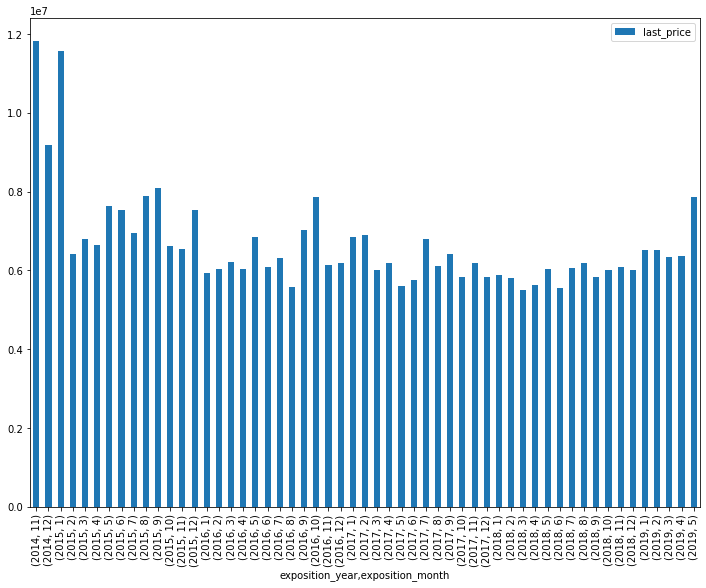

In [114]:
(data
 .pivot_table(index=['exposition_year', 'exposition_month'], 
              values='last_price', 
              aggfunc='mean')
 .plot
 .bar(y='last_price', figsize=(12, 9)))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Однако, в разрезе годов и месяцев можно заметить рехкий спад в начале 2015 года, и пики спроса летом вкупе со снижением спроса ближе к зимним месяцам</div>

#### 1.4.8.6.   Заключение

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Каждый фактор влияет на стоимость квартиры, однако сильнее всех – расположение и общая площадь
<br><br>Количество комнат прямо пропорционально стоимости квартиры, однако, не дает критичного роста, так же как и этаж</div>

### 1.4.9.   В населенных пунктах

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Оставим 10 самых популярных пунктов – как завещало ТЗ</div>

In [116]:
locality_data = list(data
                     # составляем сводную таблицу с количеством объявлений
                     .pivot_table(index='locality_name', values='last_price', aggfunc='count')
                     # сортируем по цене в порядке убывания
                     .sort_values(by='last_price', ascending=False)
                     # берем первые 10 значений
                     .head(10)
                     # берем их названия
                     .index)


# создаем словарь для пар город – средняя цена
mean_square_price = {}
for local in locality_data:
    mean_square_price[local] = (data
                                 # снова сводная, только уже по средней цене кв. м
                                 .pivot_table(index='locality_name', values='square_price', aggfunc='mean')
                                 # вытаскиваем эту самую цену
                                 .loc[local, 'square_price'])

In [117]:
mean_square_price 

{'Санкт-Петербург': 115674.43412847669,
 'Всеволожск': 67344.01838235294,
 'Пушкин': 103920.02991452992,
 'посёлок Шушары': 79538.17050691244,
 'Колпино': 75938.0985221675,
 'посёлок Мурино': 87422.445,
 'Гатчина': 69992.24832214766,
 'Петергоф': 85553.67586206897,
 'посёлок Парголово': 90900.92700729927,
 'Сестрорецк': 102266.89147286821}

In [118]:
# сортируем по уменьшению цены
sorted(mean_square_price, key=lambda x: mean_square_price[x], reverse=True)

['Санкт-Петербург',
 'Пушкин',
 'Сестрорецк',
 'посёлок Парголово',
 'посёлок Мурино',
 'Петергоф',
 'посёлок Шушары',
 'Колпино',
 'Гатчина',
 'Всеволожск']

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Самые дорогие квартиры – в Санкт-Петербурге
<br><br>На последнем месте – Всеволожск</div>

In [119]:
data['mean_square_price'] = data['last_price'] / data['total_area']

In [120]:
(data
 .query('not mean_square_price.isna()')
 .pivot_table(index='locality_name', values='mean_square_price', aggfunc=['count', 'mean'])
 .sort_values(by=('mean', 'mean_square_price'), ascending=False))

,count,mean
,mean_square_price,mean_square_price
locality_name,,
Зеленогорск,19,113037.001954
Санкт-Петербург,9792,112060.687696
деревня Мистолово,3,107121.680644
деревня Бор,1,105539.261570
Остальные,14,105449.104044
...,...,...
поселок Торковичи,2,21383.392067
поселок городского типа Никольский,1,20862.308762


### 1.4.10.   Квартиры в Санкт-Петербурге

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Выделим только квартиры в Санкт-Петербурге</div>

In [121]:
spb_data = data.query('locality_name == "Санкт-Петербург" and not cityCenters_nearest.isna()')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Приведем расстояние к типу int и поделим на 1000 – это и будет округлением до целых километров</div>

In [122]:
spb_data['integer_nearest_center'] = (spb_data['cityCenters_nearest'] // 1000).astype(int)

In [123]:
spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,square_price,floor_cat,living_to_total_square,kitchen_to_total_square,exposition_year,exposition_month,exposition_dayofweek,floor_cat_numeric,mean_square_price,integer_nearest_center
0,20,13000000.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,NaN,...,120370,Другой,0.472222,0.231481,2019,3,3,2,120370.370370,16
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,NaN,...,100000,Другой,0.320000,0.041000,2018,6,1,2,100000.000000,8
9,18,5400000.0,61.0,2017-02-26,3.0,NaN,9.0,43.6,7,NaN,...,88524,Другой,0.714754,0.106557,2017,2,6,2,88524.590164,15
10,5,5050000.0,39.6,2017-11-16,NaN,2.67,12.0,20.3,3,NaN,...,127525,Другой,0.512626,0.214646,2017,11,3,2,127525.252525,13
16,11,6700000.0,82.0,2017-11-23,3.0,3.05,5.0,55.6,1,NaN,...,81707,Первый,0.678049,0.109756,2017,11,3,1,81707.317073,10


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим на график цены / удаленности</div>

<AxesSubplot:xlabel='integer_nearest_center'>

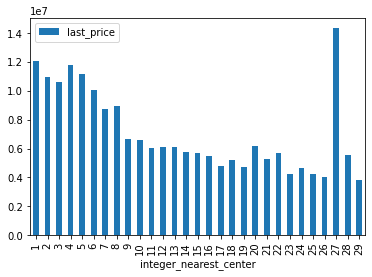

In [124]:
spb_data.pivot_table(index='integer_nearest_center', values='last_price', aggfunc='mean').plot.bar()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Граница сильного изменения показателей графика – около 5 км
<br><br>Там и будет центр</div>

### 1.4.11.   Квартиры в центре Санкт-Петербурга

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Оставим только центровские квартиры</div>

In [125]:
spb_center_data = spb_data.query('integer_nearest_center <= 5')

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим на описание данных в них</div>

In [126]:
spb_center_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,1641.000000,1.663000e+03,1295.000000,1593.000000
mean,87.522657,1.130240e+07,2.841699,3.094212
std,36.517510,6.347436e+06,0.748284,0.267053
min,28.600000,1.600000e+06,2.000000,2.510000
25%,60.200000,6.990000e+06,2.000000,2.900000
50%,80.500000,9.300000e+06,3.000000,3.050000
75%,108.600000,1.350000e+07,3.000000,3.300000
max,197.900000,3.700000e+07,4.000000,3.760000


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В общей площади среднее 87, медиана – 80, значит, половина квартир стоит значительно выше, что завышает среднее
<br><br>Цена продажи выглядит так же – среднее 1.1, медиана – 0.9
<br><br>Комнаты и высота потолков на одном уровне медианы и среднего</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим на гистограмму площади квартир в центре</div>

<AxesSubplot:>

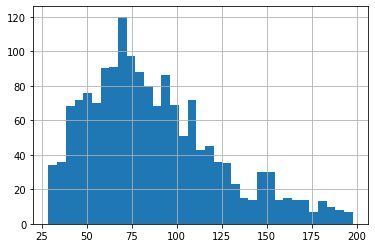

In [127]:
spb_center_data['total_area'].hist(bins=35)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
И в общих данных</div>

<AxesSubplot:>

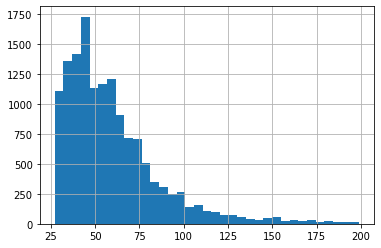

In [128]:
data['total_area'].hist(bins=35)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Заметно, что большинство квартир из общих данных перетягивают площадь в меньшую сторону, у них с 75 кв.м начинается спад, в то время как это же значение является пиковым для квартир в центре</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Оценим так же по цене</div>

<AxesSubplot:>

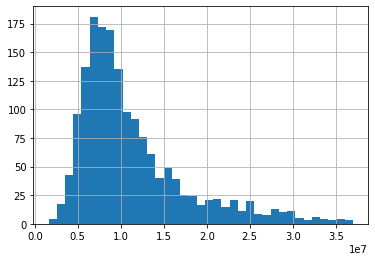

In [129]:
spb_center_data['last_price'].hist(bins=37)

<AxesSubplot:>

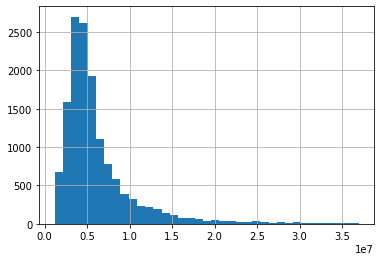

In [130]:
data['last_price'].hist(bins=37)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Картина очень похожа – пики общих цен выходят на 3-4 млн, а в центре – на 6-8 млн</div>

<AxesSubplot:>

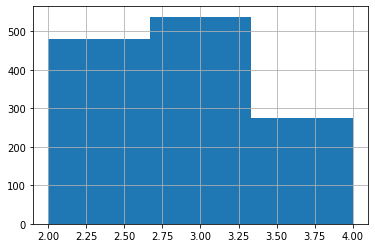

In [131]:
spb_center_data['rooms'].hist(bins=3)

<AxesSubplot:>

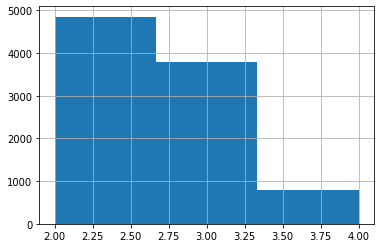

In [132]:
data['rooms'].hist(bins=3)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь критически меняются местами только 2 и 3 комнаты – в центре предпочитают тройные, в общей массе – с двумя</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Исследуем высоту потолков</div>

<AxesSubplot:>

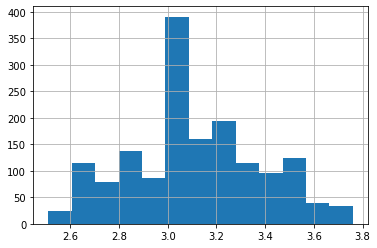

In [133]:
spb_center_data['ceiling_height'].hist(bins=13)

<AxesSubplot:>

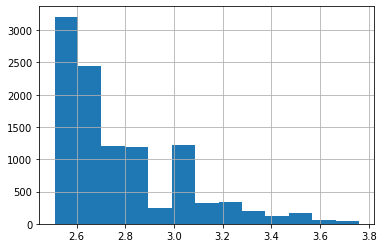

In [134]:
data['ceiling_height'].hist(bins=13)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь ситуация более интересная – три метра над уровнем пола все еще остаются заметным пиком, но в отличии от (я так подозреваю, ~старых~ исторических) квартир в центре, общая масса новых застроек стремится к значением 2.4-2.5 м</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Построим зависимость цены от различных показателей</div>

In [135]:
# от количества комнат
spb_center_data[['last_price', 'rooms']].corr()

,last_price,rooms
last_price,1.000000,0.221977
rooms,0.221977,1.000000


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

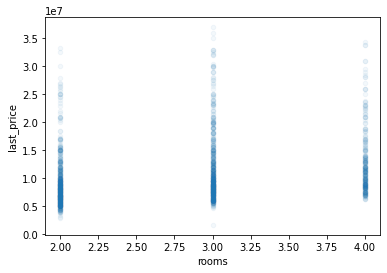

In [136]:
spb_center_data.plot(y='last_price', x='rooms', kind='scatter', alpha=0.05)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Цена драматически не меняется, но виден рост при увеличении комнат</div>

In [137]:
# от этажа помещения
spb_center_data[['last_price', 'floor']].corr()

,last_price,floor
last_price,1.000000,0.237353
floor,0.237353,1.000000


<AxesSubplot:xlabel='floor', ylabel='last_price'>

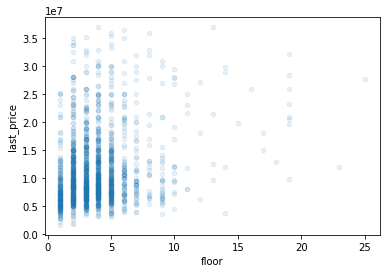

In [138]:
spb_center_data.plot(y='last_price', x='floor', kind='scatter', alpha=0.1)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь заметно, что на первых ~ этажах цены не сильно отличаются друг от друга, однако, начиная с 15 этажа видно увеличение общей стоимости квартиры, даже с учетом меньшего количества объявлений</div>

In [139]:
# от удаленности от центра
spb_center_data[['last_price', 'integer_nearest_center']].corr()

,last_price,integer_nearest_center
last_price,1.000000,0.005505
integer_nearest_center,0.005505,1.000000


<AxesSubplot:xlabel='integer_nearest_center', ylabel='last_price'>

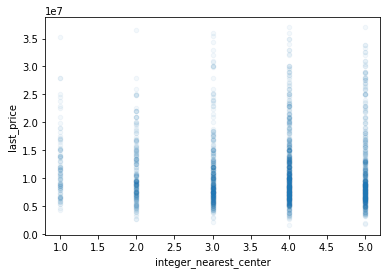

In [140]:
spb_center_data.plot(y='last_price', x='integer_nearest_center', kind='scatter', alpha=0.05)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь так же – предложений больше, чем дальше от центра, однако, цены выше именно в центре</div>

In [141]:
# от дня размещения объявления
spb_center_data[['last_price', 'exposition_dayofweek']].corr()

,last_price,exposition_dayofweek
last_price,1.000000,-0.038563
exposition_dayofweek,-0.038563,1.000000


<AxesSubplot:xlabel='exposition_dayofweek', ylabel='last_price'>

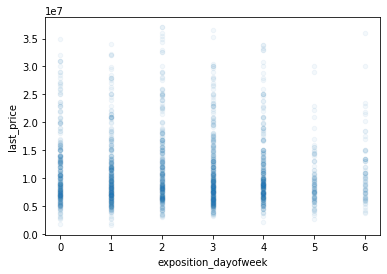

In [142]:
spb_center_data.plot(y='last_price', x='exposition_dayofweek', kind='scatter', alpha=0.05)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь видно лишь то, что выходные значительно понижают цену</div>

## 1.5.   Общий вывод

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Получено: датасет с данными квартир и информацией об их продаже
<br><br>Исправлено: заменены отсутствующие значения там, где это возможно и критично: высота потолков, размеры самой квартиры и т.д.
<br><br>Так же заменены отсутствующие значения там, где это логично, как, например, с балконами
<br><br>Отделены друг от друга расстояния (переведены в км), дни, месяцы и годы продажи
<br><br>Основные выводы:
<br><br>1. На цену сильно вляет местоположение квартиры – квартиры в центре продаются по гораздо большей цене
<br><br>2. За центр считаем все на расстоянии в 5 км
<br><br>3. Исключительные квартиры создают большие выбросы – после чистки квартилей ниже 1 и выше 99 данные заметно преображаются
<br><br>4. Количество комнат слабо влияет на цену квартиры, особенно не в центре
<br><br>5. Высота потолков для центра – 3 метра для подавляющей части квартир, и 2.5 метра для квартир в регионах
<br><br>6. Среднее время продажи квартиры – до 80-100 дней, самые частые быстрые продажи – в первые 2-3 недели
<br><br>7. Цена сильно меняется при нахождении квартиры выше 15 этажа</div>